# FLIGHT FARE PREDICTION PROJECT :


# BUSINESS CASE:

- The business case consists of flight ticket fares for different airlines and different destination.
- Airlines namely Indigo, Air India etc were part of the study.
- The dataset provided was in Excel format.
- The dataset consists of 11 columns and 10683 rows.
- Inorder to solve the business case Regression techniques can be used to predict the future air tickets prices.
- The data provided the frequency of the flights from Delhi to Cochin were the most.
- The least being Chennai to Kolkata.
- Sources are : New Delhi, Chennai, Mumbai, Banglore, Kolkata.
- Destination : New Delhi, Banglore, Cochin, Hyderabad and Kolkata.
- Mean price : Rs 9087.00
- Min price : Rs 1759.00
- Max price : Rs 79512.00
- About 75% of the flights had a fare of about Rs 12373.00
- Most price flacuations were observed in 01/03/2019, even reaching the max price.
- Among the sources Chennai had the least carriers operating.
- In terms of stops : Spicejet had the most number of flights with 1 stop.
- TruJet had more number of Non-Stop flights.


- ML MODELS USED           : XGBREGRESSOR, LINEAR REGRESSION, RANDOMFORESTREGRESSOR.
- METRICS USED             : r2_score, MSE
- BASED ON THE ABOVE MODEL : XGBREGRESSOR SHOWED BETTER RESULTS BASED ON THE ABOVE METRICS.
- PACKAGES USED            : SKLEARN, PANDAS, DATETIME, MATPLOTLIB, SEABORN, COLLECTIONS.
- FEATURE RELATED          : FEATURE SCALING, FEATURE GENERATION, LABEL ENCODING.
- 3 MODELS WERE BUILT TO ANALYSE THE CASE.

In [47]:
#Importing necessary packages

import pandas as pd
import numpy as np
from collections import Counter
from datetime import time
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder,scale
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import r2_score,adjusted_rand_score,mean_squared_error
import datetime as dt

# DATA COLLECTION :

In [89]:
data_raw = pd.read_excel('Flight_Fare.xlsx')
data_raw

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# DEFINING X AND Y VARIABLES:
- DEPENDENT VARIABLES   : 'PRICE'

- INDEPENDENT VARIABLES : 'AIRLINE', 'DATE OF JOURNEY', 'SOURCE', 'DESTINATION', 'DEP_TIME', 'ARRIVAL_TIME',           'DURATION','TOTAL_STOPS', 'ADDITIONAL_INFO'.

- FEATURES WERE GENERATED FROM DATE OF JOURNEY, DEP_TIME, ARRIVAL_TIME, DURATION DUE TO THE MODEL NOT ACCEPTING THE OBJECT DTYPE.

In [49]:
#EDITING VALUES AT ROWS 0 AND 1 TO TIME FORMAT:
data_raw.replace(to_replace='Delhi',value='New Delhi',inplace=True)


# E.D.A AND VISUALIZATION :

In [50]:
#BASIC CHECKS 

print('info of data:',data_raw.info())
print('description of data:',data_raw.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
info of data: None
description of data:               Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [51]:
# Checking for Nan values:

data_raw.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [52]:
#Dropping the Nan values:

data_raw.dropna(inplace=True)

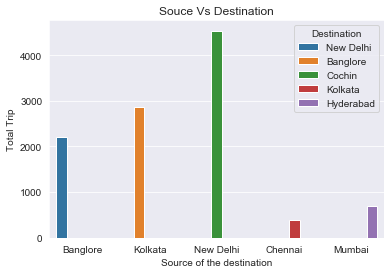

In [53]:
sb.countplot('Source',hue='Destination',data=data_raw)
plt.ylabel('Total Trip')
plt.xlabel('Source of the destination')
plt.title('Souce Vs Destination')
plt.show()
#from the grpah we observe that only Banglore has 2 destination



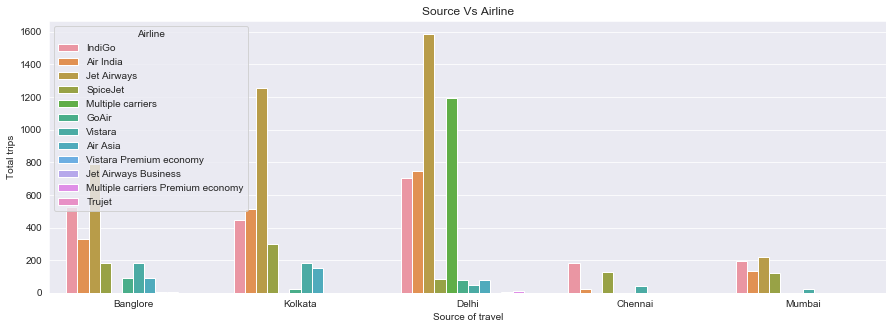

In [97]:
sb.countplot('Source',hue='Airline',data=data_raw,orient="h")
rcParams["figure.figsize"]=[15,5]
plt.xlabel('Source of travel')
plt.ylabel('Total trips')
plt.title('Source Vs Airline')
plt.show()

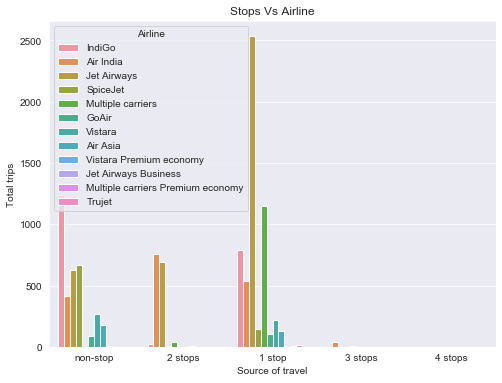

In [55]:
sb.set_style(style='darkgrid')
sb.countplot('Total_Stops',hue='Airline',data=data_raw,orient="h")
rcParams["figure.figsize"]=[15,8]
plt.xlabel('Source of travel')
plt.ylabel('Total trips')
plt.title('Stops Vs Airline')
plt.show()

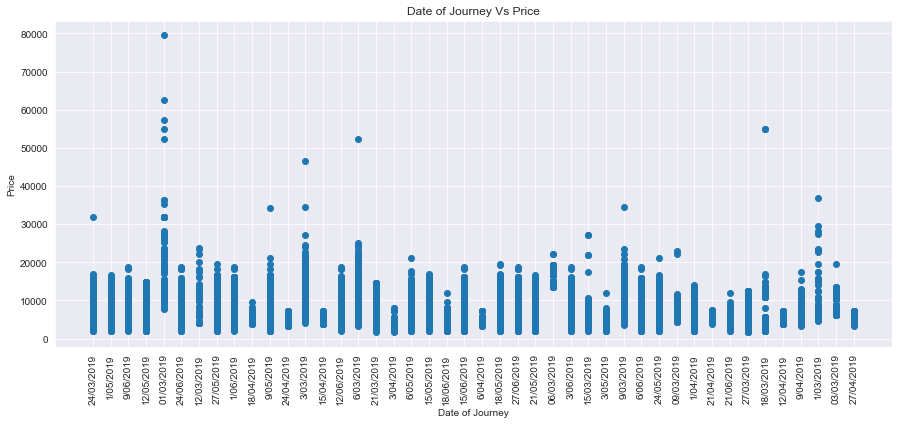

In [56]:
rcParams["figure.figsize"]=[15,6]
sb.set_style(style='darkgrid')
y_price = data_raw.Price
x_date = data_raw.Date_of_Journey
plt.title('Date of Journey Vs Price')
plt.xticks(rotation=90)
plt.ylabel('Price')
plt.xlabel('Date of Journey')
plt.scatter(x_date,y_price,)
plt.show()


 # DATA PRE-PROCESSING:

In [ ]:
# Replacing Delhi as New Delhi...

data_raw.replace(to_replace='Delhi',value='New Delhi',inplace=True)


In [ ]:
#Dropping the Nan values:

data_raw.dropna(inplace=True)

In [57]:
# FEATURE GENERATION FROM TIME AND DATE TYPE FEATURES AND TYPE CAST TO INTEGER TYPE:

data_raw['Day']=data_raw['Date_of_Journey'].str.split('/').str[0].astype('int64')
data_raw['Month']=data_raw['Date_of_Journey'].str.split('/').str[1].astype('int64')
data_raw['year']=data_raw['Date_of_Journey'].str.split('/').str[2].astype('int64')


In [58]:
data_raw['Depart_hour']=data_raw['Dep_Time'].str.split(':').str[0].astype('int64')
data_raw['Depart_min']=data_raw['Dep_Time'].str.split(':').str[1].astype('int64')


In [59]:
data_raw['Arrival_hour']=data_raw['Arrival_Time'].str.split(':').str[0].astype('int64')
data_raw['Arrival_min']=data_raw['Arrival_Time'].str.split(':').str[1]
data_raw['Arrival_min1']=data_raw['Arrival_min'].str.split(" ").str[0].astype('int64')

In [60]:
data_raw.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,year,Depart_hour,Depart_min,Arrival_hour,Arrival_min,Arrival_min1
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10 22 Mar,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,15
2,Jet Airways,9/06/2019,New Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25 10 Jun,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,35
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25,25
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,2019,18,55,10,25 13 Mar,25
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,2019,8,0,5,05 02 Mar,5
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,2019,8,55,10,25 13 Mar,25
9,Multiple carriers,27/05/2019,New Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15,15


In [61]:
#LABEL ENCODING AND DROPPING THE UNWANTED COLUMN:

data_raw.at[0,'Arrival_min']=10
data_raw.at[2,'Arrival_min']=25
data_raw.at[99,'Arrival_min']=35
data_raw.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Route','Duration','Arrival_min'],axis=1,inplace=True)

enc = LabelEncoder()
data_raw.Airline = enc.fit_transform(data_raw.Airline)
data_raw.Source = enc.fit_transform(data_raw.Source)
data_raw.Destination = enc.fit_transform(data_raw.Destination)
data_raw.Additional_Info = enc.fit_transform(data_raw.Additional_Info)
data_raw.Total_Stops = enc.fit_transform(data_raw.Total_Stops)


In [62]:
data_raw.head(5)


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,year,Depart_hour,Depart_min,Arrival_hour,Arrival_min1
0,3,0,4,4,8,3897,24,3,2019,22,20,1,10
1,1,2,0,1,8,7662,1,5,2019,5,50,13,15
2,4,4,1,1,8,13882,9,6,2019,9,25,4,25
3,3,2,0,0,8,6218,12,5,2019,18,5,23,30
4,3,0,4,0,8,13302,1,3,2019,16,50,21,35


In [63]:
#LOOKING FOR FEATURE ELIMINATION USING COR.RELATION:

data_cat = data_raw.loc[:,['Airline','Source','Destination','Additional_Info','Total_Stops']]
data_cat.corr()

,Airline,Source,Destination,Additional_Info,Total_Stops
Airline,1.000000,-0.016231,0.025974,-0.060748,0.035973
Source,-0.016231,1.000000,-0.654012,-0.006496,-0.496726
Destination,0.025974,-0.654012,1.000000,0.039209,0.490618
Additional_Info,-0.060748,-0.006496,0.039209,1.000000,0.164054
Total_Stops,0.035973,-0.496726,0.490618,0.164054,1.000000


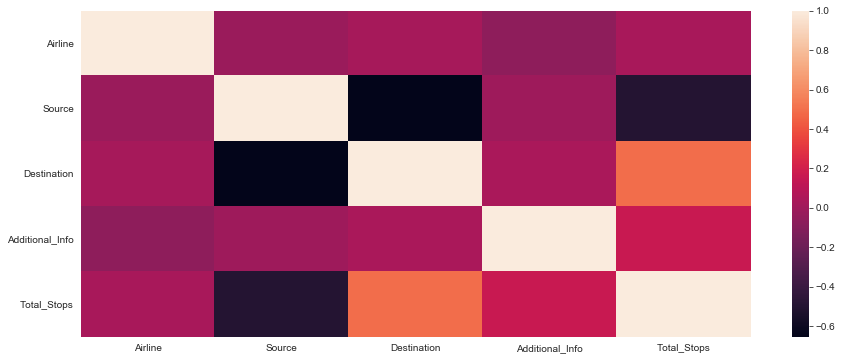

In [64]:
sb.heatmap(data_cat.corr())

# MODEL SELECTION AND BUILDING :

- MODEL 1 : XGBOOST

In [65]:
!pip install xgboost

In [66]:
from xgboost import XGBRegressor

In [67]:
X = data_raw.drop(['Price'],axis=1)
y = data_raw.Price

In [68]:
X_scaled = pd.DataFrame(scale(X))
X_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.410805,-1.591582,1.738661,1.407210,0.499921,1.237288,-1.467402,0.0,1.654154,-0.234950,-1.800436,-0.890014
1,-1.261152,-0.301554,-1.026423,-0.253703,0.499921,-1.475307,0.250289,0.0,-1.303113,1.363607,-0.050909,-0.587094
2,0.014369,0.988474,-0.335152,-0.253703,0.499921,-0.531796,1.109135,0.0,-0.607286,0.031476,-1.363054,0.018745
3,-0.410805,-0.301554,-1.026423,-0.807341,0.499921,-0.177979,0.250289,0.0,0.958326,-1.034229,1.407030,0.321664
4,-0.410805,-1.591582,1.738661,-0.807341,0.499921,-1.475307,-1.467402,0.0,0.610412,1.363607,1.115442,0.624584
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,-0.301554,-1.026423,1.407210,0.499921,-0.531796,-0.608557,0.0,1.132283,1.630034,1.261236,0.018745
10678,-1.261152,-0.301554,-1.026423,1.407210,0.499921,1.591104,-0.608557,0.0,1.306240,1.097181,1.407030,-0.284175
10679,0.014369,-1.591582,1.738661,1.407210,0.499921,1.591104,-0.608557,0.0,-0.781243,-0.234950,-0.342497,-0.284175
10680,2.565411,-1.591582,1.738661,1.407210,0.499921,-1.475307,-1.467402,0.0,-0.259372,0.297903,0.094885,-0.890014


In [69]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=10)

In [70]:
xgb = XGBRegressor(learning_rate=0.1,max_depth=10,n_estimators=200,objective='reg:linear')
xgb.fit(X_train,y_train)
y_predict = xgb.predict(X_test)

[16:34:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


# MODEL EVALUATION:

In [71]:
r2_score(y_predict,y_test)

0.8495183160579552

In [72]:
mean_squared_error(y_test,y_predict,squared=False)

1643.9640120739705

In [73]:
print(y_predict)
print(y_test)

[ 7177.629 13290.399 10482.329 ... 10282.721 10277.204 10834.142]
2389      6224
5411     14151
2674     10539
970       7934
5845     16754
         ...  
10518     9416
2055     25430
9676      5226
3459     10262
10341    10844
Name: Price, Length: 3205, dtype: int64


- CROSS VALIDATION - K FOLD
- K= 4

In [74]:
# CROSS VALIDATION FOR XGBREGRESSOR
cv_4_results_xgb = cross_val_score(xgb,X,y,cv=4,scoring='neg_mean_squared_error')

[16:34:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[16:34:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:17

In [75]:
cv_4_results_xgb

array([-3106667.6935191 , -1525369.06281052, -3341515.58529586,
       -2246569.29418239])

# LINEAR MODEL
- MODEL2: LINEAR MODEL

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
linmodel = LinearRegression()
linmodel.fit(X_train,y_train)
y_predict_linmodel = linmodel.predict(X_test)

In [78]:
r2_score(y_test,y_predict_linmodel)

0.3625587389048738

In [79]:
mean_squared_error(y_test,y_predict_linmodel,squared=False)

3694.325467416793

- CROSS VALIDATION - K FOLD
- K= 4

In [80]:
# CROSS VALIDATION FOR LINEAR MODEL;

cv_4_results_linmodel = cross_val_score(linmodel,X,y,cv=4,scoring='neg_mean_squared_error')

In [81]:
cv_4_results_linmodel

array([-14183406.700587  , -12358266.09910439, -14044667.96671551,
       -13208064.99626265])

# RANDOM FOREST REGRESSOR:
- MODEL 3:

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
Rndmmodel = RandomForestRegressor(n_estimators=100,max_depth=4,random_state=13)
Rndmmodel.fit(X_train,y_train)
y_predict_Rndmmodel = Rndmmodel.predict(X_test)

In [84]:
r2_score(y_test,y_predict_Rndmmodel)

0.5801924449136728

In [85]:
mean_squared_error(y_test,y_predict_Rndmmodel,squared=False)

2998.059123066661

- CROSS VALIDATION :

In [86]:
cv_4_results_Rndmmodel = cross_val_score(Rndmmodel,X,y,cv=4,scoring='neg_mean_squared_error')

In [87]:
cv_4_results_Rndmmodel

array([-9735288.08042958, -6030188.56056398, -8373624.31727   ,
       -7239406.97154833])

# MODEL EVALUATION:
- SUMMARY OF THE ALL THREE MODELS

In [108]:
D = {'MODEL':['XBG','LIN','RANDF'],'R2_score':[0.845,0.362,0.580],'MSE':[1643,3694,2998]}
pd.DataFrame(data=D)

,MODEL,R2_score,MSE
0,XBG,0.845,1643
1,LIN,0.362,3694
2,RANDF,0.580,2998


- CONCLUSION : It looks like XGB regressor performed better than all 3 models.
